<a href="https://colab.research.google.com/github/joohoshin/MLDL_Basic/blob/master/14_1_Keras_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import Image

In [ ]:
from google.colab import drive
drive.mount('/g')

Drive already mounted at /g; to attempt to forcibly remount, call drive.mount("/g", force_remount=True).


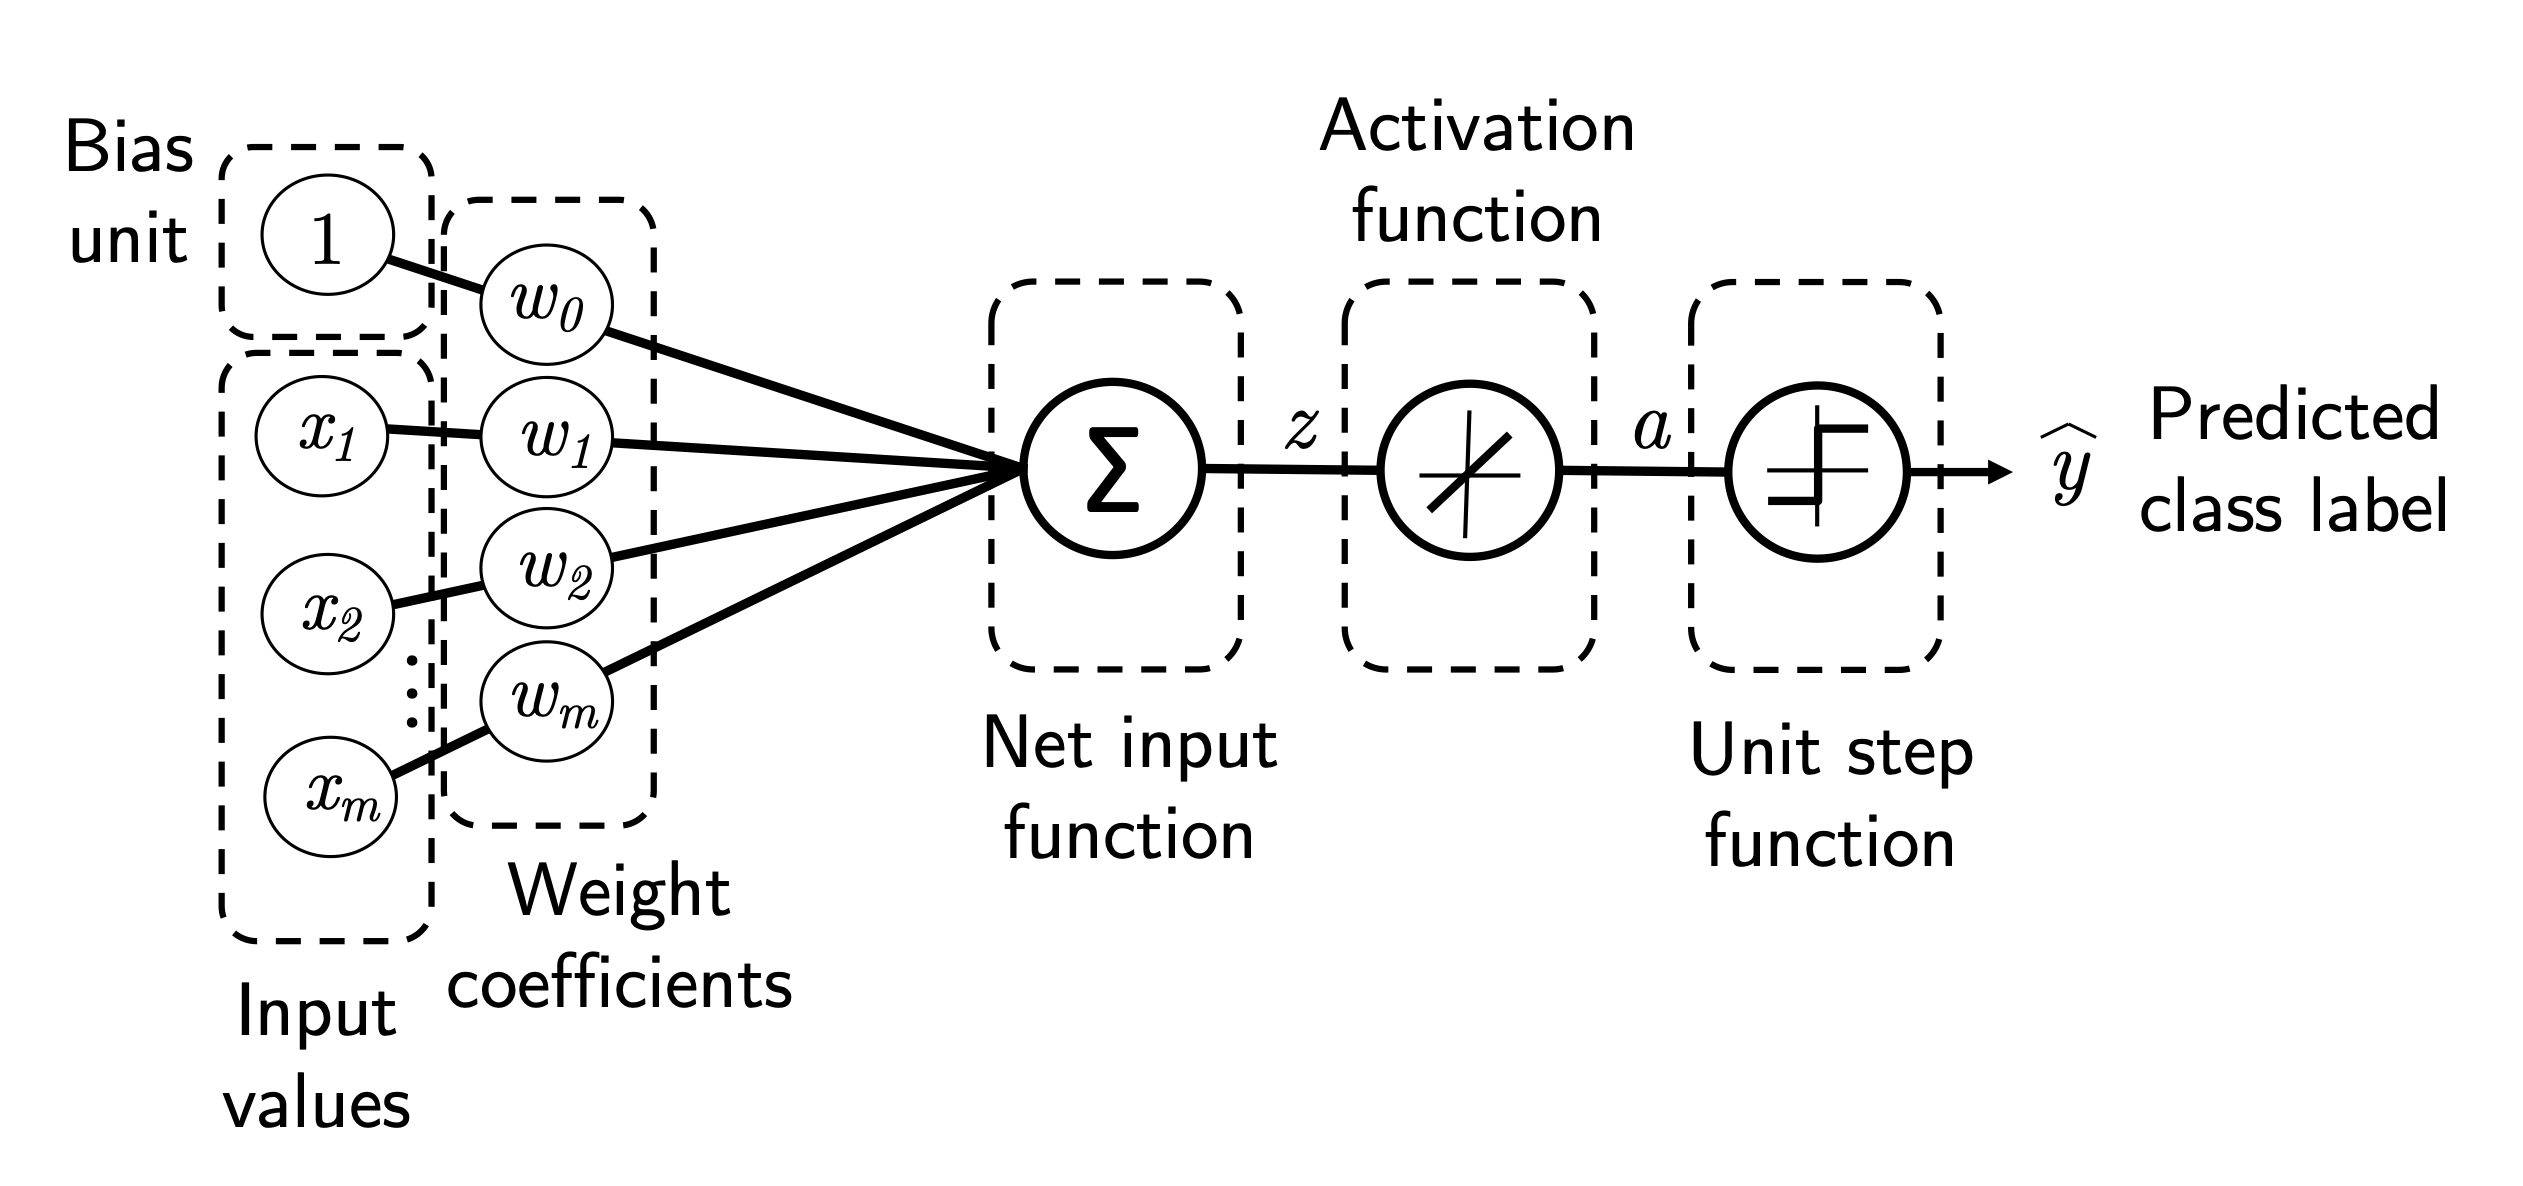

In [ ]:
Image(filename='/g/My Drive/ML_DL_202002/images_ch12/12_01.png', width=600) 

### MultiLayer Perceptron

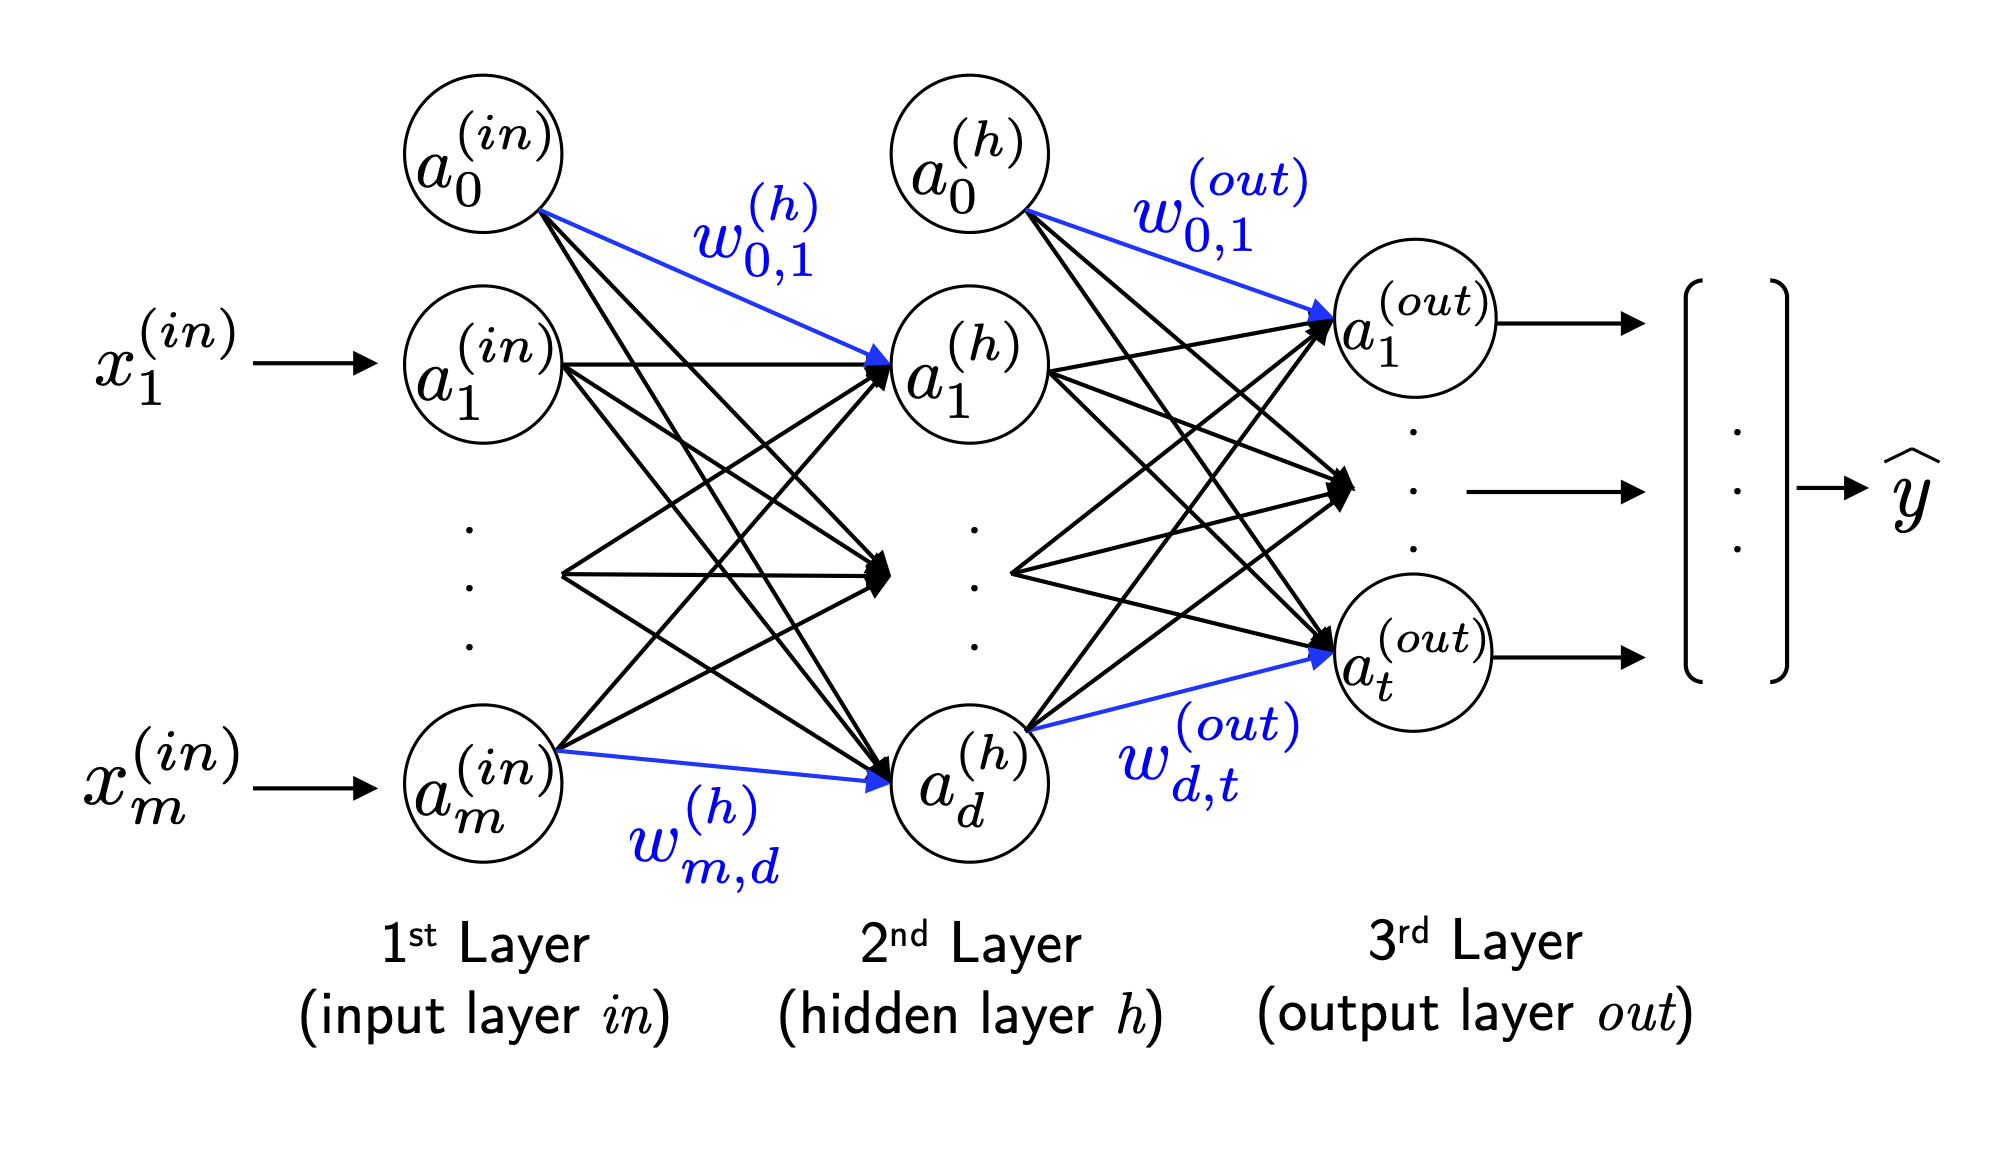

In [ ]:
Image(filename='/g/My Drive/ML_DL_202002/images_ch12/12_02.png', width=600) 

교재 14장의 예제를 참고해서 간단한 Regression을 해보겠습니다

In [ ]:
# 가상의 데이터셋 만들기

import numpy as np
import matplotlib.pyplot as plt

x= np.random.uniform(low=-2, high=2, size=200)
y= [np.random.normal(loc=0.0, scale=(0.5+t*t/3)) for t in x]
y= 1.726*x-0.84+np.array(y)

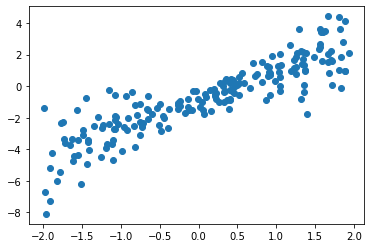

In [ ]:
plt.scatter(x,y)

In [ ]:
# train, test 나누기
x_train, y_train = x[:150], y[:150]
x_test, y_test = x[150:], y[150:]

In [ ]:
x_train.shape

(150,)

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([  
  tf.keras.layers.Dense(1)  
])

In [ ]:
model.compile(optimizer='sgd', loss='mse')
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
5/5 [==============================] - 0s 17ms/step - loss: 3.1308 - val_loss: 2.3599
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 2.7596 - val_loss: 2.0417
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 2.4686 - val_loss: 1.7896
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 2.2232 - val_loss: 1.5920
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 2.0297 - val_loss: 1.4377
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 1.8643 - val_loss: 1.3198
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 1.7350 - val_loss: 1.2267
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 1.6283 - val_loss: 1.1563
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 1.5410 - val_loss: 1.1038
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 1.4706 - val_loss: 1.0652
Epoch 11/100
5/5 [==========

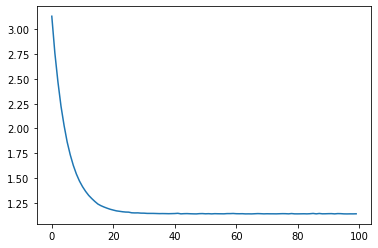

In [ ]:
plt.plot(history.history['loss'])

In [ ]:
model.layers[0].weights

[<tf.Variable 'dense_4/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.837306]], dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(1,) dtype=float32, numpy=array([-0.9629103], dtype=float32)>]

In [ ]:
model.layers[0].bias

<tf.Variable 'dense_4/bias:0' shape=(1,) dtype=float32, numpy=array([-0.9629103], dtype=float32)>

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.predict(y_test[[0]])

array([[-7.0850406]], dtype=float32)

In [ ]:
y_test[0]

-3.332123177262742

In [ ]:
model.predict([2])

array([[2.7117019]], dtype=float32)

In [ ]:
y_func= lambda x: -0.9629103 + 1.837306 * x

In [ ]:
y_func(2)

2.7117017000000003

In [ ]:
import pandas as pd
df = pd.DataFrame({'x':x, 'y':y})

In [ ]:
df

,x,y
0,-1.133846,-2.046402
1,-0.293182,-0.898509
2,0.374895,-1.108039
3,-0.522797,-2.534330
4,-1.233978,-3.005273
...,...,...
195,-0.412941,-1.825811
196,-1.948772,-4.303527
197,-1.254067,-3.010072
198,-0.868869,-1.997290


In [ ]:
df.loc[:150,'type_'] = 'train'
df.loc[150:,'type_'] = 'test'

In [ ]:
df

,x,y,type_
0,-1.133846,-2.046402,train
1,-0.293182,-0.898509,train
2,0.374895,-1.108039,train
3,-0.522797,-2.534330,train
4,-1.233978,-3.005273,train
...,...,...,...
195,-0.412941,-1.825811,test
196,-1.948772,-4.303527,test
197,-1.254067,-3.010072,test
198,-0.868869,-1.997290,test


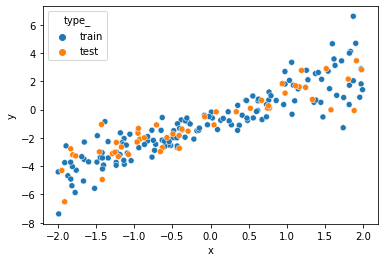

In [ ]:
import seaborn as sns
sns.scatterplot(data=df, x='x', y='y', hue='type_')